## Demo for learning single channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='zernike',channeltype='1ch',sysfile='M2')


##### Edit user defined parameters

In [3]:
L.param.datapath = 'E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'Pos' # keyword for your data file
L.param.subfolder = 'Pos' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1
L.param.ccd_offset = 400
L.param.FOV.z_step = 5  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 120 
L.param.batch_size = 25 # lower this number if out of memory
#L.param.option.model.var_photon = True
#L.param.loss_weight.Inorm = 1

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos0_30ms_conventional_Z_1\Pos0_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos1_30ms_conventional_Z_1\Pos1_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos10_30ms_conventional_Z_1\Pos10_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos11_30ms_conventional_Z_1\Pos11_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos2_30ms_conventional_Z_1\Pos2_30ms_conventional_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data 2022/230202_Nup96SNAP_NC_M2/beads_30ms_conventional/30ms_conventional\Pos3_30ms_conventional_Z_1\Pos3_30ms_conventional_Z_1_MMStack_Default.om

3/6: learning: 31/250 [00:19s]  1.62it/s, current loss: 4.09560, total time: 19.19s  
4/6: calculating spline coefficients: 1/1 [00:01s]  1.86s/it total time: 21.04s
5/6: localization: 5/5 [00:00s]  8.36it/s total time: 21.64s


outlier id: [  5   7  15  16  19  25  30  39  40  44  51  57  58  59  68  69  81  86
  92  99 109 110 111]
rois shape channel : (90, 48, 21, 21)


3/6: learning: 205/250 [01:25s]  2.41it/s, current loss: 0.66254, total time: 106.70s  
4/6: calculating spline coefficients: 1/1 [00:01s]  1.87s/it total time: 108.56s
5/6: localization: 5/5 [00:00s]  9.54it/s total time: 109.09s
3/6: learning: 213/250 [01:28s]  2.41it/s, current loss: 0.66254, total time: 88.34s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.88s/it total time: 90.21s
5/6: localization: 5/5 [00:00s]  9.27it/s total time: 90.75s


outlier id: [ 3  8 41 48 64 74 89]
rois shape channel : (83, 48, 21, 21)


3/6: learning: 173/250 [01:09s]  2.51it/s, current loss: 0.64706, total time: 159.79s  
4/6: calculating spline coefficients: 1/1 [00:01s]  1.87s/it total time: 161.64s
5/6: localization: 5/5 [00:00s]  9.68it/s total time: 162.16s
6/6: saving results: [00:00s] total time: 162.30s


##### Show results

In [15]:
f,p = io.h5.load(resfile) # load result file

In [16]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'loc']
 res:
     ['I_model', 'apodization', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'zernike_coeff', 'zernike_polynomial']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


In [17]:
f.res.sigma

array([1.076061, 1.151971], dtype=float32)

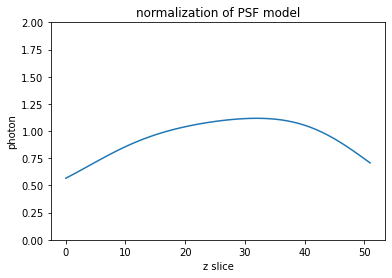

In [18]:
plt.plot(np.sum(f.res.I_model,axis=(-1,-2)))
plt.ylim([0,2])
plt.xlabel("z slice")
plt.ylabel("photon")
plt.title("normalization of PSF model")
plt.show()

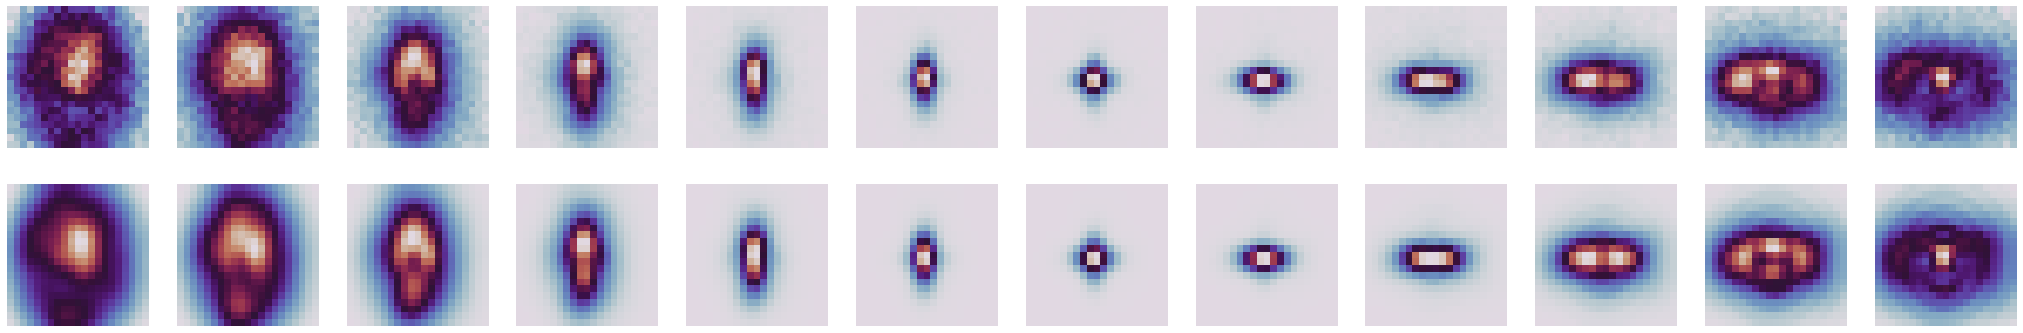

In [19]:
showpsfvsdata(f,p,index=0)

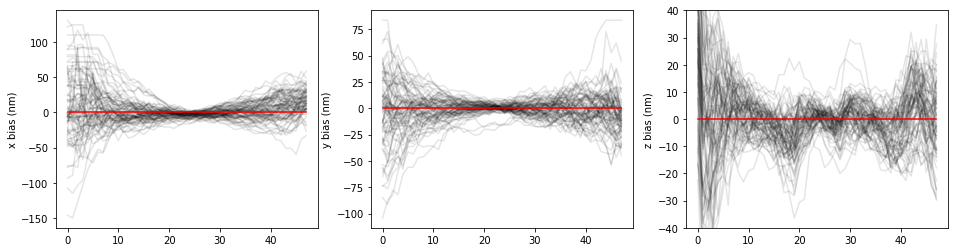

In [20]:
showlocalization(f,p)

##### Optional plots

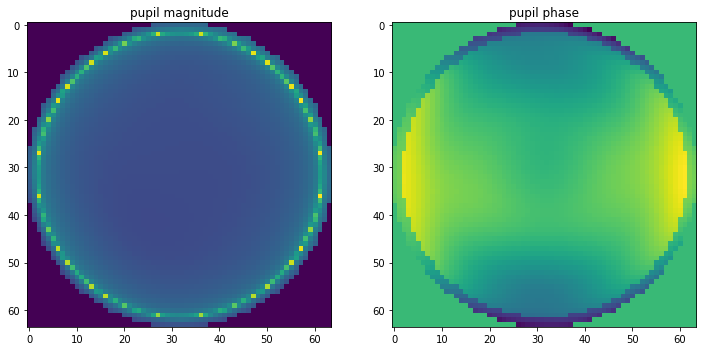

In [12]:
try:
    showpupil(f,p)
except:
    print('no pupil')

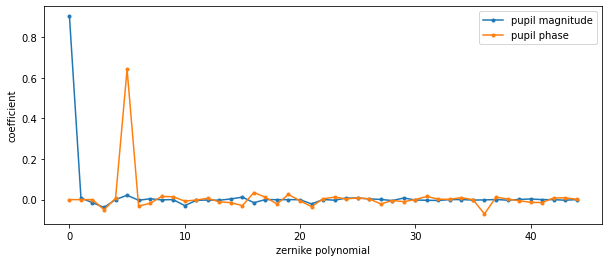

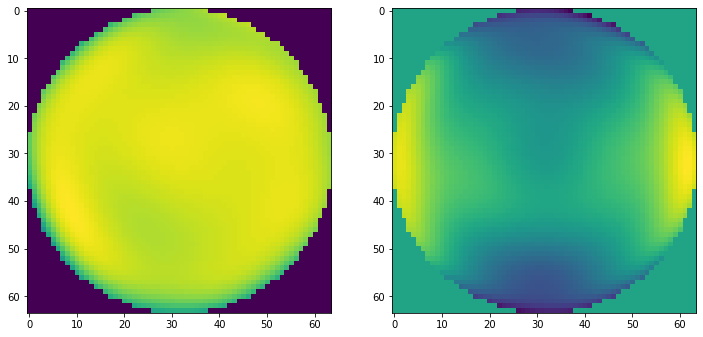

In [13]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

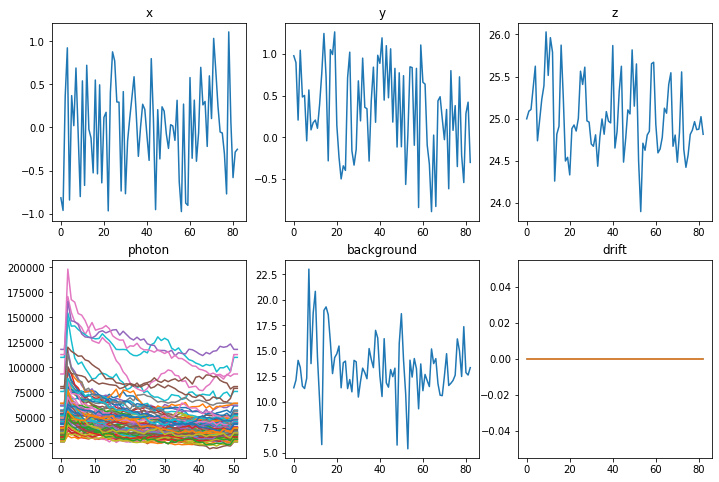

In [21]:
showlearnedparam(f,p)